In [1]:
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Scale the data
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import numpy as np
import math

In [2]:
%store -r corn_price_history_df
df = corn_price_history_df
df

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
1,2020-07-31,3.1500,3.1600,0.0025,0.079177,3.1500,3.1500,551566,64381.0,3.1575,3.1750,3.1450
2,2020-07-30,3.1575,3.1575,0.0025,0.079239,3.1575,3.1600,555042,104818.0,3.1550,3.1925,3.1525
3,2020-07-29,3.1550,3.1550,-0.0450,-1.406250,3.1550,3.1575,551611,118641.0,3.2000,3.2150,3.1525
4,2020-07-28,3.2025,3.2000,-0.0500,-1.538462,3.2000,3.2025,542505,96543.0,3.2300,3.2350,3.2000
5,2020-07-27,3.2550,3.2500,-0.0125,-0.383142,3.2525,3.2550,544625,83374.0,3.2525,3.2750,3.2325
...,...,...,...,...,...,...,...,...,...,...,...,...
500,2018-08-07,3.8475,3.8450,-0.0075,-0.194679,3.8450,3.8475,803169,202109.0,3.8525,3.8800,3.8325
501,2018-08-06,3.8500,3.8525,0.0100,0.260247,3.8475,3.8500,807913,98617.0,3.8450,3.8625,3.8250
502,2018-08-03,3.8425,3.8425,0.0300,0.786885,3.8425,3.8450,808689,123360.0,3.8125,3.8575,3.7900
503,2018-08-02,3.8175,3.8125,0.0175,0.461133,3.8150,3.8175,808149,246583.0,3.7975,3.8725,3.7925


In [3]:
df.index = df.pop('Date')
df.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2020-07-31,3.1500,3.1600,0.0025,0.079177,3.1500,3.1500,551566,64381.0,3.1575,3.1750,3.1450
2020-07-30,3.1575,3.1575,0.0025,0.079239,3.1575,3.1600,555042,104818.0,3.1550,3.1925,3.1525
2020-07-29,3.1550,3.1550,-0.0450,-1.406250,3.1550,3.1575,551611,118641.0,3.2000,3.2150,3.1525
2020-07-28,3.2025,3.2000,-0.0500,-1.538462,3.2000,3.2025,542505,96543.0,3.2300,3.2350,3.2000
2020-07-27,3.2550,3.2500,-0.0125,-0.383142,3.2525,3.2550,544625,83374.0,3.2525,3.2750,3.2325


In [4]:
df = df.sort_values('Date')
df.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2018-08-01,3.8000,3.7950,0.0000,0.000000,3.7975,3.8025,817895,208725.0,3.8625,3.8725,3.7825
2018-08-02,3.8175,3.8125,0.0175,0.461133,3.8150,3.8175,808149,246583.0,3.7975,3.8725,3.7925
2018-08-03,3.8425,3.8425,0.0300,0.786885,3.8425,3.8450,808689,123360.0,3.8125,3.8575,3.7900
2018-08-06,3.8500,3.8525,0.0100,0.260247,3.8475,3.8500,807913,98617.0,3.8450,3.8625,3.8250
2018-08-07,3.8475,3.8450,-0.0075,-0.194679,3.8450,3.8475,803169,202109.0,3.8525,3.8800,3.8325


In [5]:
data = df[['Last', 'Open Interest']]
data

,Last,Open Interest
Date,,
2018-08-01,3.8000,817895
2018-08-02,3.8175,808149
2018-08-03,3.8425,808689
2018-08-06,3.8500,807913
2018-08-07,3.8475,803169
...,...,...
2020-07-27,3.2550,544625
2020-07-28,3.2025,542505
2020-07-29,3.1550,551611


In [6]:
#Convert to numpy array
dataset = data.values
dataset

array([[3.80000e+00, 8.17895e+05],
       [3.81750e+00, 8.08149e+05],
       [3.84250e+00, 8.08689e+05],
       ...,
       [3.15500e+00, 5.51611e+05],
       [3.15750e+00, 5.55042e+05],
       [3.15000e+00, 5.51566e+05]])

In [7]:
training_data_len = math.ceil(len(dataset)*.8)
val_data_len = math.ceil(len(dataset)*.9)

training_data_len, val_data_len

(404, 454)

In [9]:
#Split data into independant and dependant dataset

x = dataset[:, 0:1]
y = dataset[:, 0]

In [10]:
#x, y = df_to_x_y(data, window_size = 10)

In [11]:
#Scale the data
standard_scaler = StandardScaler()
x_scale = standard_scaler.fit_transform(x)
x_scale

array([[ 0.29447966],
       [ 0.35404076],
       [ 0.43912805],
       [ 0.46465423],
       [ 0.45614551],
       [ 0.46465423],
       [ 0.37956695],
       [-0.00332583],
       [-0.01183456],
       [ 0.17535747],
       [ 0.15834001],
       [ 0.29447966],
       [ 0.26044475],
       [ 0.20939238],
       [ 0.07325272],
       [-0.14797422],
       [-0.3521837 ],
       [-0.28411387],
       [-0.3521837 ],
       [-0.52235827],
       [-0.50534081],
       [-0.51384954],
       [-0.18200913],
       [-0.09692185],
       [-0.20753532],
       [-0.16499167],
       [-0.13095676],
       [-0.13946549],
       [-0.16499167],
       [-0.60744555],
       [-0.70104157],
       [-0.67551538],
       [-0.80314631],
       [-0.97332088],
       [-0.88823359],
       [-0.6499892 ],
       [-0.46279717],
       [-0.3521837 ],
       [-0.25858769],
       [-0.30964006],
       [-0.21604404],
       [-0.50534081],
       [-0.19051786],
       [-0.13095676],
       [-0.2330615 ],
       [-0

In [12]:
#Split the data into 80% training (testing 10% and svalidation 10%)
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size = 0.5, random_state=42)

In [13]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape 

((403, 1), (50, 1), (51, 1), (403,), (50,), (51,))

In [16]:
#Reshape the data
x_train, x_val = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)), np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_train.shape, x_val.shape

((403, 1, 1), (50, 1, 1))

In [17]:
#Build LSTM model
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = [RootMeanSquaredError()])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 80, epochs = 10, shuffle = True)

Epoch 1/10
6/6 [==============================] - 9s 230ms/step - loss: 13.8704 - root_mean_squared_error: 3.7243 - val_loss: 13.0011 - val_root_mean_squared_error: 3.6057
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 13.4516 - root_mean_squared_error: 3.6676 - val_loss: 12.6220 - val_root_mean_squared_error: 3.5528
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 13.0296 - root_mean_squared_error: 3.6097 - val_loss: 12.1500 - val_root_mean_squared_error: 3.4857
Epoch 4/10
6/6 [==============================] - 0s 18ms/step - loss: 12.4881 - root_mean_squared_error: 3.5339 - val_loss: 11.5013 - val_root_mean_squared_error: 3.3914
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 11.7393 - root_mean_squared_error: 3.4263 - val_loss: 10.6124 - val_root_mean_squared_error: 3.2577
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 10.7108 - root_mean_squared_error: 3.2727 - val_loss: 9.4030 - val_root_m

In [20]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = standard_scaler.inverse_transform(predictions)
predictions

2/2 [==============================] - 2s 7ms/step


array([[4.481753 ],
       [4.415752 ],
       [4.462034 ],
       [4.4347878],
       [4.489677 ],
       [4.4497995],
       [4.426829 ],
       [4.475222 ],
       [4.5717072],
       [4.4430685],
       [4.4359207],
       [4.441192 ],
       [4.4146004],
       [4.4788556],
       [4.4853625],
       [4.490394 ],
       [4.3720865],
       [4.4715757],
       [4.3732734],
       [4.378012 ],
       [4.462034 ],
       [4.4557486],
       [4.4426937],
       [4.5060368],
       [4.4527783],
       [4.47595  ],
       [4.391748 ],
       [4.485723 ],
       [4.3901844],
       [4.4535217],
       [4.465347 ],
       [4.473765 ],
       [4.4180517],
       [4.534143 ],
       [4.465347 ],
       [4.447934 ],
       [4.4605584],
       [4.4605584],
       [4.450545 ],
       [4.472306 ],
       [4.43441  ],
       [4.399926 ],
       [4.463876 ],
       [4.4594502],
       [4.485002 ],
       [4.473765 ],
       [4.382736 ],
       [4.484281 ],
       [4.3764343],
       [4.5286627],


C:\Users\tusha\AppData\Local\Temp\ipykernel_1984\2547506372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_and_test['Predictions'] = predictions


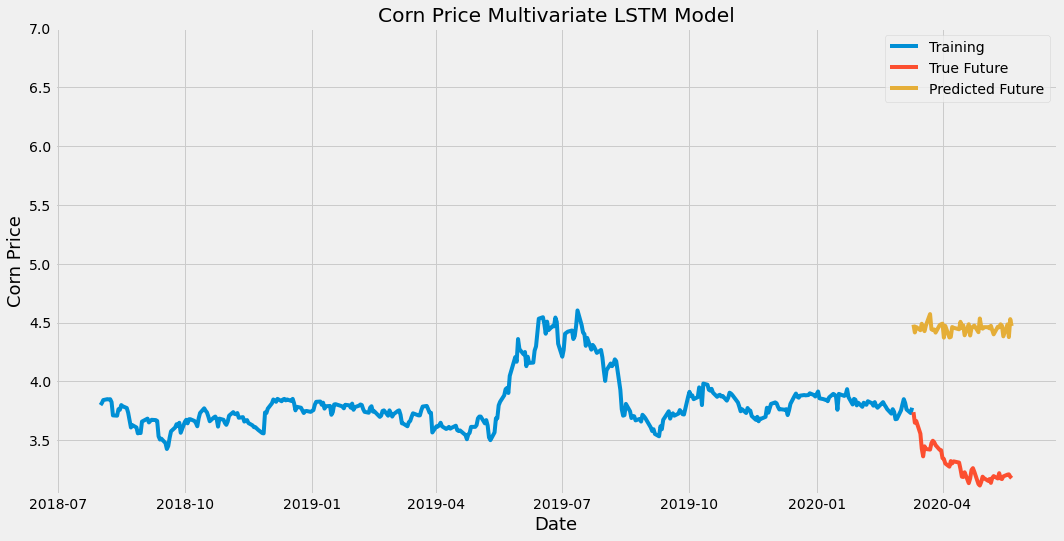

In [21]:
#Create dataframes
train = data[:training_data_len]
valid_and_test = data[training_data_len:val_data_len + 1]
valid_and_test['Predictions'] = predictions

#test = pd.DataFrame(data = {'Predictions': predictions})

#Visualise
plt.figure(figsize=(16,8))
plt.title('Corn Price Multivariate LSTM Model')
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Corn Price', fontsize = 18)
plt.plot(train['Last'])
plt.plot(valid_and_test[['Last', 'Predictions']])
plt.legend(['Training', 'True Future', 'Predicted Future'])
plt.ylim(top = 7)
plt.show()

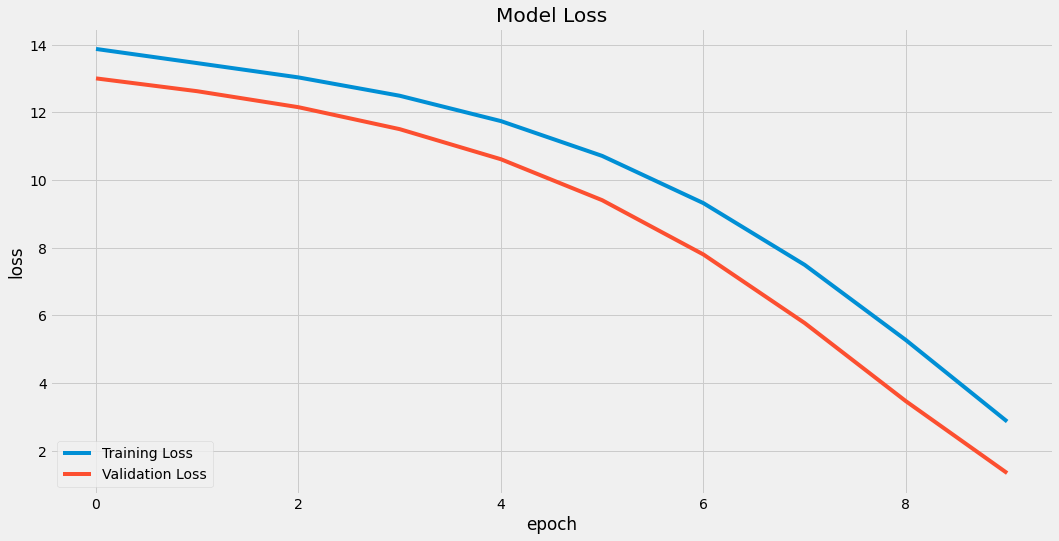

In [22]:
#Visualise loss
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

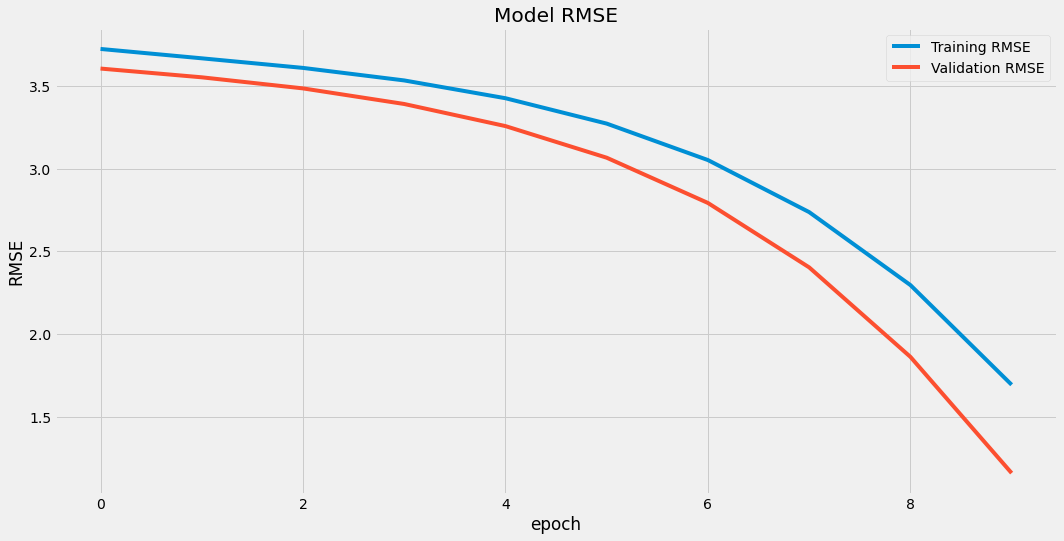

In [23]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()